# TRAIN SETS EDA
---
---
### *Overall, weather seemed to impact average and high cycling periods. I assumed my performance was higher in the spring but you could argue that performance wasn't necessarily higher, since heart rate didn't vary too much, but more so the weather and distance rode during each activitiy were what brought the variety. What is being critiqued in performance is really what can determine the difference here. More descriptions in each section below.*

# Table of Contents
---
### [Sources  ](#Sources)
### [Imports  ](#Imports)
### [Intensity](#Heart-Rate-Intensity)
### [Descriptive Statistics](#Descriptive-Stats)
### [Histogram Comparisons](#Histograms!-(Average-&-High-Comparisons))
### [Headwind](#Exploring-Headwind)
### [Heatmaps](#Heatmaps!)
### [Findings](#Curious-Findings)
### [Strava Summaries](#Strava-Timeseries-EDA)

# Sources
---

In [1]:
# Adaptations from lessons 1.07, 1.08, and 8.02
# https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
# https://mediawiki.ivao.aero/index.php?title=Crosswind_and_Headwind_calculation

# Imports
---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore")

In [3]:
a_df = pd.read_csv('../data/average/a_df.csv')
h_df = pd.read_csv('../data/high/h_df.csv')
s_df = pd.read_csv('../data/strava.csv')

In [4]:
# create speed column
a_df['speed_km_hr'] = (a_df['dist_diff_km']/a_df['time_diff_s'])*60*60
a_df['speed_km_hr'].fillna(0, inplace = True)
h_df['speed_km_hr'] = (h_df['dist_diff_km']/h_df['time_diff_s'])*60*60
h_df['speed_km_hr'].fillna(0, inplace = True)

# Heart Rate Intensity
---

In [5]:
# threshold and resting heart rate
thresh_hr = 220 - 33
rest_hr = 44

# heart rate reserve
hrr = thresh_hr - rest_hr

# target zones (5 zones - from garmin article)
hr_z1 = .7*thresh_hr
hr_z2 = .8*thresh_hr
hr_z3 = .9*thresh_hr
hr_z4 = 1*thresh_hr
hr_z5 = 1.1*thresh_hr
print(hr_z1, hr_z5, thresh_hr)

130.9 205.70000000000002 187


## Average DF Intensity

In [6]:
a_df['intensity'] = [1 if hr < hr_z1 
                     else 2 if (hr < hr_z2 and hr >= hr_z1)
                     else 3 if (hr < hr_z3 and hr >= hr_z2)
                     else 4 if (hr < hr_z4 and hr >= hr_z3)
                     else 5 
                     for hr in a_df['heart_rate']]

In [7]:
a_df.head()

,timestamp,latitude,longitude,elevation,dt,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,lat_lon,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,speed_km_hr,intensity
0,2022-07-20 16:07:45+00:00,38.773466,-121.363686,35.799999,1658333265,78,0.000000,0,0,0.000000,0.0,"(38.77346634864807, -121.36368582956493)",0.0000,0.0000,297.65,297.17,1019,39,282.80,1,0.45,177,0.00,1
1,2022-07-20 16:07:46+00:00,38.773542,-121.363672,35.599998,1658333266,79,8.292053,1,1,-0.200001,-0.2,"(38.77354153431952, -121.36367183178663)",0.0084,0.0084,297.65,297.17,1019,39,282.80,1,0.45,177,30.24,1
2,2022-07-20 16:07:49+00:00,38.773630,-121.363682,35.200001,1658333269,82,-5.321180,3,4,-0.399998,-0.6,"(38.77363029867411, -121.36368239298463)",0.0099,0.0183,297.65,297.17,1019,39,282.80,1,0.45,177,11.88,1
3,2022-07-20 16:07:51+00:00,38.773789,-121.363733,35.000000,1658333271,83,-13.956066,2,6,-0.200001,-0.8,"(38.77378871664405, -121.36373268440366)",0.0181,0.0364,297.67,297.17,1019,38,282.43,1,0.45,177,32.58,1
4,2022-07-20 16:07:52+00:00,38.773786,-121.363766,35.000000,1658333272,83,-96.936537,1,7,0.000000,-0.8,"(38.77378553152084, -121.36376612819731)",0.0029,0.0393,297.67,297.17,1019,38,282.43,1,0.45,177,10.44,1


In [8]:
a_df['intensity'].value_counts()

1    6722
2    5024
3    3288
4      59
Name: intensity, dtype: int64

## High DF Intensity

In [9]:
h_df['intensity'] = [1 if hr < hr_z1 
                     else 2 if (hr < hr_z2 and hr >= hr_z1)
                     else 3 if (hr < hr_z3 and hr >= hr_z2)
                     else 4 if (hr < hr_z4 and hr >= hr_z3)
                     else 5 
                     for hr in h_df['heart_rate']]

In [10]:
h_df.head()

,timestamp,latitude,longitude,elevation,dt,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,lat_lon,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,speed_km_hr,intensity
0,2022-04-02 01:03:00+00:00,38.773809,-121.364250,36.400002,1648861380,84,0.000000,0,0,0.000000,0.0,"(38.7738086655736, -121.36424959637225)",0.0000,0.0000,297.94,297.10,1011,24,276.02,0,2.57,170,0.000000,1
1,2022-04-02 01:03:02+00:00,38.773917,-121.364357,36.400002,1648861382,84,-37.730123,2,2,0.000000,0.0,"(38.77391695976257, -121.36435663327575)",0.0152,0.0152,298.20,297.39,1010,24,276.24,0,2.57,170,27.360000,1
2,2022-04-02 01:03:03+00:00,38.773931,-121.364338,36.400002,1648861383,84,46.140647,1,3,0.000000,0.0,"(38.77393095754087, -121.3643380254507)",0.0022,0.0174,298.20,297.39,1010,24,276.24,0,2.57,170,7.920000,1
3,2022-04-02 01:03:06+00:00,38.773830,-121.363695,36.200001,1648861386,87,101.328638,3,6,-0.200001,-0.2,"(38.773830039426684, -121.36369454674423)",0.0569,0.0743,297.95,297.11,1011,24,276.03,0,2.57,170,68.280000,1
4,2022-04-02 01:03:13+00:00,38.774046,-121.363505,35.799999,1648861393,89,34.489431,7,13,-0.400002,-0.6,"(38.77404646016657, -121.36350461281836)",0.0292,0.1035,297.94,297.10,1011,24,276.02,0,2.57,170,15.017143,1


In [11]:
h_df['intensity'].value_counts()

2    17458
1    17358
3     3781
4        3
Name: intensity, dtype: int64

# Descriptive Stats
---

## Means Compared
The means for the period of average cycling performance and high cycling performance had some interesting contrasts. **Overall many of the differences made sense given high performance cycling period was during the Spring month of April, consisted of a lot longer rides (75+ miles per week), and in varying terrains. Average performance consisted of shorter rides (< 30 miles per week), in the Summer month of July, and usually on the same local routes.**

In [12]:
a_means = pd.DataFrame(a_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].mean()).T
h_means = pd.DataFrame(h_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].mean()).T
# https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
mean_df = pd.concat([a_means, h_means])
mean_df['df'] = ['average', 'high']
mean_df = mean_df[['df','elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].reset_index(drop = True)
mean_df

,df,elevation,heart_rate,total_time_s,total_ele_change_m,total_dist_km,speed_km_hr,temp,pressure,humidity,wind_speed,wind_deg
0,average,45.852806,130.216524,4321.134897,15.606069,16.800886,19.657203,301.292206,1012.618101,44.217651,2.849349,201.724906
1,high,111.131974,130.536503,8399.799067,0.453819,36.261384,20.171376,294.003020,1016.601062,35.675518,4.245174,228.520440


## Standard Deviations Compared
Standard Deviations also had some interesting contrasts which made sense based on seasonal weather, distances, and terrains of the types of cycling activities done in July (average performance time period) compared to April (high performance time period).

In [13]:
a_std = pd.DataFrame(a_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].std()).T
h_std = pd.DataFrame(h_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].std()).T
# https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
std_df = pd.concat([a_std, h_std])
std_df['df'] = ['average', 'high']
std_df = std_df[['df','elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].reset_index(drop = True)
std_df

,df,elevation,heart_rate,total_time_s,total_ele_change_m,total_dist_km,speed_km_hr,temp,pressure,humidity,wind_speed,wind_deg
0,average,35.234763,22.326544,3928.332512,36.065958,12.365763,7.522595,4.980350,2.278902,15.954423,1.763974,73.641993
1,high,101.052281,16.295913,7307.734127,67.987665,32.619315,8.169250,4.925191,4.551366,16.943021,2.471781,95.418639


## Maximums Compared
Maximums really highlight the difference in performance periods. 
- Max **distance** during high cycling was a 130km/80mile ride, my longest ride this year. 
- Max **heart rate** and **speed** for average period is higher than high performance period which makes sense since some shorter routes have been HIIT workouts, with sprinting, and have also been in higher heat which adds an extra cardio component. 
- Clearly can see the seasonal differences in the **temperature** differences. 311K (100F, 37.85C) in July during average period and 301K(82F, 27.85C) for April during the high period.
- Max windspeed during the high period was cross checked and from an organized metric century ride through the Bay Area. If I recall correctly some of those winds almost knocked me over. 

In [14]:
a_max = pd.DataFrame(a_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].max()).T
h_max = pd.DataFrame(h_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].max()).T
# https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
max_df = pd.concat([a_max, h_max])
max_df['df'] = ['average', 'high']
max_df = max_df[['df','elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].reset_index(drop = True)
max_df

,df,elevation,heart_rate,total_time_s,total_ele_change_m,total_dist_km,speed_km_hr,temp,pressure,humidity,wind_speed,wind_deg
0,average,149.000000,173.0,17192.0,108.2,51.1183,179.64,311.31,1020.0,85.0,8.49,345.0
1,high,573.200012,170.0,26819.0,130.4,130.0462,168.84,301.25,1024.0,86.0,12.35,360.0


In [15]:
# h_df[h_df['wind_speed'] == 12.35]

## Minimums Compared
Nothing too notable, same conclusions about weather seasons, but interesting how I went below sea level (in meters) on some routes, mostly from valley routes, and my minimum for elevation change during high performance had a pretty stark net decline. Cross checking on Strava and that was from a gravel bike ride around the American River, in the Sierra Mountains foothills, which was a super fun ride where I basically went from the top of a mountain down to a river in a canyon and back. 

In [16]:
a_min = pd.DataFrame(a_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].min()).T
h_min = pd.DataFrame(h_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].min()).T
# https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
min_df = pd.concat([a_min, h_min])
min_df['df'] = ['average', 'high']
min_df = min_df[['df','elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].reset_index(drop = True)
min_df

,df,elevation,heart_rate,total_time_s,total_ele_change_m,total_dist_km,speed_km_hr,temp,pressure,humidity,wind_speed,wind_deg
0,average,-12.6,64.0,0.0,-22.0,0.0,0.0,290.89,1002.0,19.0,0.45,0.0
1,high,-1.8,63.0,0.0,-348.8,0.0,0.0,279.76,972.0,11.0,0.00,0.0


In [17]:
h_df[h_df['total_ele_change_m'] == -348.8]

,timestamp,latitude,longitude,elevation,dt,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,lat_lon,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,speed_km_hr,intensity
28387,2022-04-23 20:52:58+00:00,38.96196,-120.924044,218.199997,1650747178,104,104.235094,6,3209,-0.199997,-348.8,"(38.961959509178996, -120.92404386028647)",0.0147,5.4781,294.77,294.14,1021,44,282.01,0,3.09,0,8.82,1


## Full Average Descriptive Stats

In [18]:
# a_df.columns

In [19]:
# a_df.isnull().sum()

In [20]:
a_df.drop(columns = ['timestamp', 'dt', 'clouds']).describe()

,latitude,longitude,elevation,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,speed_km_hr,intensity
count,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000
mean,38.586889,-121.488046,45.852806,130.216524,-2.776795,4.615186,4321.134897,0.000040,15.606069,0.019487,16.800886,301.292206,300.979265,1012.618101,44.217651,287.081487,2.849349,201.724906,19.657203,1.780296
std,0.352987,0.415925,35.234763,22.326544,102.895403,34.527208,3928.332512,0.703347,36.065958,0.032462,12.365763,4.980350,4.871462,2.278902,15.954423,2.120303,1.763974,73.641993,7.522595,0.794122
min,37.764476,-122.511310,-12.600000,64.000000,-179.972185,0.000000,0.000000,-62.599997,-22.000000,0.000000,0.000000,290.890000,290.780000,1002.000000,19.000000,280.980000,0.450000,0.000000,0.000000,1.000000
25%,38.620566,-121.393815,24.799999,116.000000,-94.139953,1.000000,1210.000000,-0.200001,-7.000000,0.006800,6.500200,298.970000,298.570000,1011.000000,36.000000,285.660000,1.180000,170.000000,16.200000,1.000000
50%,38.772230,-121.363614,31.400000,134.000000,1.391347,3.000000,2929.000000,0.000000,-1.200000,0.013500,15.021000,302.920000,302.110000,1013.000000,40.000000,287.580000,3.090000,210.000000,20.880000,2.000000
75%,38.792374,-121.298207,48.599998,148.000000,86.604426,5.000000,6963.000000,0.200001,19.600000,0.026600,23.519800,304.510000,304.110000,1014.000000,44.000000,288.360000,4.020000,238.000000,24.240000,2.000000
max,38.804297,-121.143542,149.000000,173.000000,180.000000,3474.000000,17192.000000,4.200012,108.200000,3.466300,51.118300,311.310000,310.250000,1020.000000,85.000000,292.200000,8.490000,345.000000,179.640000,4.000000


## Full High Descriptive Stats

In [21]:
# h_df.columns

In [22]:
# h_df.isnull().sum()

In [23]:
h_df.drop(columns = ['timestamp', 'dt', 'clouds']).describe()

,latitude,longitude,elevation,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,speed_km_hr,intensity
count,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000
mean,38.485317,-121.429791,111.131974,130.536503,1.603520,4.248005,8399.799067,0.006306,0.453819,0.018448,36.261384,294.003020,292.898380,1016.601062,35.675518,276.819671,4.245174,228.520440,20.171376,1.648420
std,0.414123,0.336267,101.052281,16.295913,103.035525,24.135510,7307.734127,0.768012,67.987665,0.015599,32.619315,4.925191,5.415387,4.551366,16.943021,3.401498,2.471781,95.418639,8.169250,0.651426
min,37.644578,-122.194799,-1.800000,63.000000,-179.993179,0.000000,0.000000,-38.799988,-348.800000,0.000000,0.000000,279.760000,275.200000,972.000000,11.000000,265.370000,0.000000,0.000000,0.000000,1.000000
25%,38.563461,-121.521660,42.400002,122.000000,-88.217476,1.000000,2277.000000,-0.200001,-9.200000,0.007000,9.723100,291.460000,290.350000,1013.000000,22.000000,274.870000,2.570000,200.000000,15.120000,1.000000
50%,38.633479,-121.332440,60.200001,132.000000,1.614857,2.000000,6082.000000,0.000000,5.400000,0.013200,23.919150,295.250000,294.170000,1017.000000,33.000000,277.480000,4.020000,240.000000,21.240000,2.000000
75%,38.717714,-121.190749,154.800003,142.000000,89.445124,5.000000,13334.250000,0.200012,22.000000,0.024800,57.656875,297.180000,296.500000,1020.000000,44.000000,279.420000,5.660000,290.000000,25.080000,2.000000
max,39.165856,-120.903862,573.200012,170.000000,180.000000,2114.000000,26819.000000,47.600006,130.400000,0.336600,130.046200,301.250000,299.900000,1024.000000,86.000000,282.640000,12.350000,360.000000,168.840000,4.000000


# Histograms! (Average & High Comparisons)
---
Notable differences between average and high period in distance, temperature, and windspeed. Expected due to changes in the seasons during each period and activity distances. Not much difference between speed and heart rate though. 

## Hist Function

In [24]:
def to_hist(column, Title):
    
    '''
    Input: column name as string, Title as string
    Output: overlapping histograms comparing average performance period and high performance period
    '''
    
    # lesson 1.08
    plt.figure(figsize = (10,6))
    hist_a = a_df[column]
    hist_h = h_df[column]

    plt.hist(hist_a, color = 'r', alpha = 0.5, label = 'Average Period')
    plt.hist(hist_h, color = 'b', alpha = 0.5, label = 'High Period')
    plt.legend()
    plt.title(Title, pad = 10, fontsize = 18);
    
    return plt.plot()

## Heart Rate
More trackpoints from high period but distribution is pretty similar with average period slight shifted to higher heart rates. Makes sense with more activities involving sprinting. 

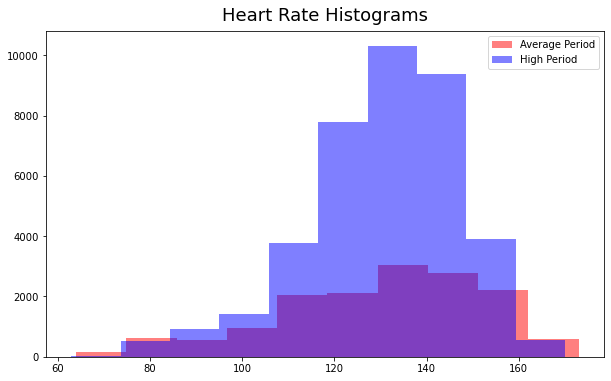

In [25]:
to_hist('heart_rate', 'Heart Rate Histograms');
plt.savefig('../images/heart_rate.png')
plt.savefig('../images/heart_rate.jpeg')

## Distance
A lot more trackpoints for further distances in the high period. Average period seems to not go much further than around 55km.

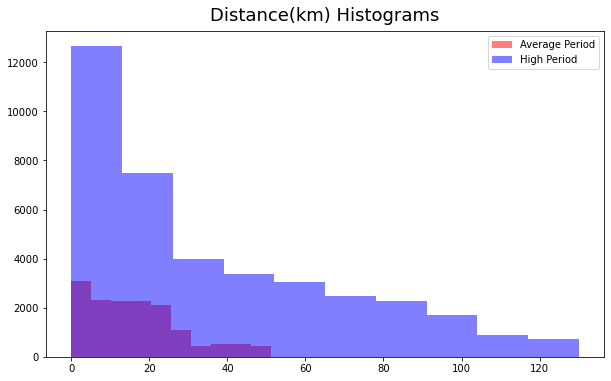

In [26]:
to_hist('total_dist_km', 'Distance(km) Histograms');
plt.savefig('../images/distance.png')
plt.savefig('../images/distance.jpeg')

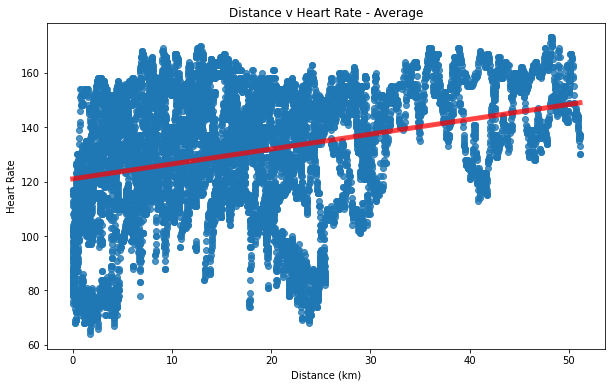

In [27]:
plt.figure(figsize = (10,6))
fig = sns.regplot(x=a_df['total_dist_km'], y=a_df['heart_rate'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Distance v Heart Rate - Average')
plt.xlabel('Distance (km)')
plt.ylabel('Heart Rate')
plt.show()

fig=fig.get_figure()
fig.savefig('../images/a_distance_hr.png')
fig.savefig('../images/a_distance_hr.jpeg');

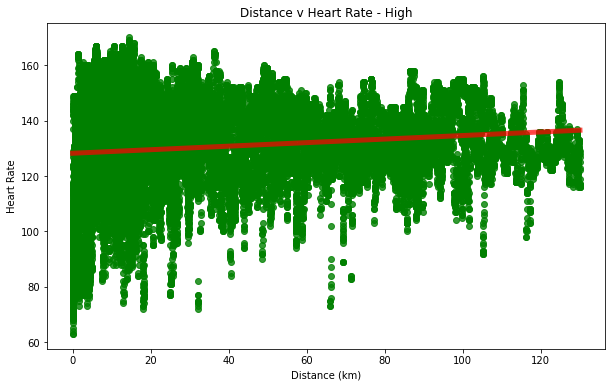

In [28]:
plt.figure(figsize = (10,6))
fig = sns.regplot(x=h_df['total_dist_km'], y=h_df['heart_rate'], line_kws={"color":"r","alpha":0.7,"lw":5}, color = 'green')
plt.title('Distance v Heart Rate - High')
plt.xlabel('Distance (km)')
plt.ylabel('Heart Rate')
plt.show()

fig=fig.get_figure()
fig.savefig('../images/h_distance_hr.png')
fig.savefig('../images/h_distance_hr.jpeg');

## Speed
Speed didn't seem to differ much. 

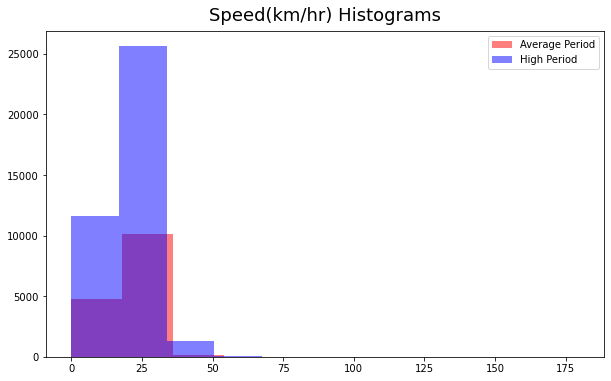

In [29]:
to_hist('speed_km_hr', 'Speed(km/hr) Histograms');
plt.savefig('../images/speed.png')
plt.savefig('../images/speed.jpeg')

## Temperature
Temperature is definitely shifted between the two periods which coincides with one period being in the spring and one period being in the summer. 

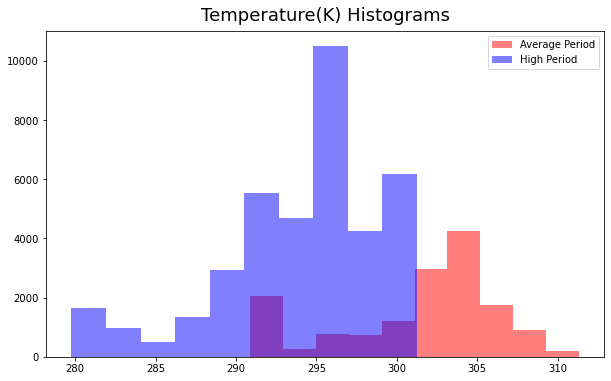

In [30]:
to_hist('temp', 'Temperature(K) Histograms');
plt.savefig('../images/temperature.png')
plt.savefig('../images/temperature.jpeg')

## Wind Speed
Wind speed seems to be pretty shifted. This could be due to seasonal weather changes or also locations that activities took place. Many activities in the high period were spread out between California's Central Valley, Sierra Foothills, and Bay Area while the average period took place mostly in the Central Valley and Sierra Foothills.

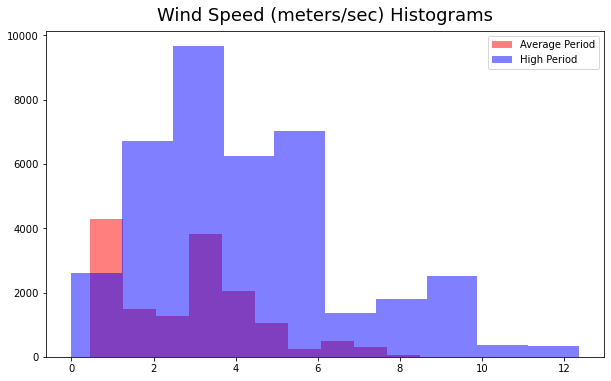

In [31]:
to_hist('wind_speed', 'Wind Speed (meters/sec) Histograms');
plt.savefig('../images/wind_speed.png')
plt.savefig('../images/wind_speed.jpeg')

# Exploring Headwind
---
Headwind doesn't seem to have as much impact as I thought it would. Might be worth exploring durations of headwinds with heart rate changes (see Tableau).

In [32]:
ah_df = pd.concat([a_df,h_df])

In [33]:
ah_df.head()

,timestamp,latitude,longitude,elevation,dt,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,lat_lon,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,speed_km_hr,intensity
0,2022-07-20 16:07:45+00:00,38.773466,-121.363686,35.799999,1658333265,78,0.000000,0,0,0.000000,0.0,"(38.77346634864807, -121.36368582956493)",0.0000,0.0000,297.65,297.17,1019,39,282.80,1,0.45,177,0.00,1
1,2022-07-20 16:07:46+00:00,38.773542,-121.363672,35.599998,1658333266,79,8.292053,1,1,-0.200001,-0.2,"(38.77354153431952, -121.36367183178663)",0.0084,0.0084,297.65,297.17,1019,39,282.80,1,0.45,177,30.24,1
2,2022-07-20 16:07:49+00:00,38.773630,-121.363682,35.200001,1658333269,82,-5.321180,3,4,-0.399998,-0.6,"(38.77363029867411, -121.36368239298463)",0.0099,0.0183,297.65,297.17,1019,39,282.80,1,0.45,177,11.88,1
3,2022-07-20 16:07:51+00:00,38.773789,-121.363733,35.000000,1658333271,83,-13.956066,2,6,-0.200001,-0.8,"(38.77378871664405, -121.36373268440366)",0.0181,0.0364,297.67,297.17,1019,38,282.43,1,0.45,177,32.58,1
4,2022-07-20 16:07:52+00:00,38.773786,-121.363766,35.000000,1658333272,83,-96.936537,1,7,0.000000,-0.8,"(38.77378553152084, -121.36376612819731)",0.0029,0.0393,297.67,297.17,1019,38,282.43,1,0.45,177,10.44,1


In [34]:
my_sq_m = .381*.4572
my_sq_m

0.1741932

In [35]:
# wind speed in m/s
ah_wind_df = ah_df[['latitude', 'longitude', 'bearing', 'speed_km_hr', 'wind_deg', 'wind_speed']]
ah_wind_df['speed_m_s'] = (ah_wind_df['speed_km_hr']*1000)/(60*60)
ah_wind_df

,latitude,longitude,bearing,speed_km_hr,wind_deg,wind_speed,speed_m_s
0,38.773466,-121.363686,0.000000,0.00,177,0.45,0.000000
1,38.773542,-121.363672,8.292053,30.24,177,0.45,8.400000
2,38.773630,-121.363682,-5.321180,11.88,177,0.45,3.300000
3,38.773789,-121.363733,-13.956066,32.58,177,0.45,9.050000
4,38.773786,-121.363766,-96.936537,10.44,177,0.45,2.900000
...,...,...,...,...,...,...,...
38595,37.781605,-122.141774,-84.988356,11.04,280,9.26,3.066667
38596,37.781509,-122.141909,-131.912054,11.52,280,9.26,3.200000
38597,37.781384,-122.141978,-156.333994,9.06,280,9.26,2.516667
38598,37.781367,-122.142001,-133.240639,1.68,280,9.26,0.466667


In [36]:
# https://mediawiki.ivao.aero/index.php?title=Crosswind_and_Headwind_calculation

# am I in a headwind or tailwind? 
# α is the angle of the wind from direction of travel. 

# Headwind heading = Aircraft heading. The angle shall be: -90° < α < +90°
# α = (Wind speed heading° - Headwind Heading°)

# Tailwind heading = Aircraft heading + 180. The angle shall be: -90° < α < +90°
# α = (Wind speed heading° - Tailwind Heading°) 

In [37]:
ah_wind_df['alpha'] = ah_wind_df['wind_deg'] - ah_wind_df['bearing']
ah_wind_df['headwind'] = [1 if alpha > -90 and alpha < 90 else 0 for alpha in ah_wind_df['alpha']]

In [38]:
ah_wind_df['headwind'].value_counts()

0    46154
1     7539
Name: headwind, dtype: int64

In [39]:
round((7539/46154)*100, 2)

16.33

In [40]:
# add alpha and headwind columns to full_df
ah_df['alpha'] = ah_df['wind_deg'] - ah_df['bearing']
ah_df['headwind'] = [1 if alpha > -90 and alpha < 90 else 0 for alpha in ah_df['alpha']]

# Heatmaps!
---
A lot of higher correlations in weather variables. 

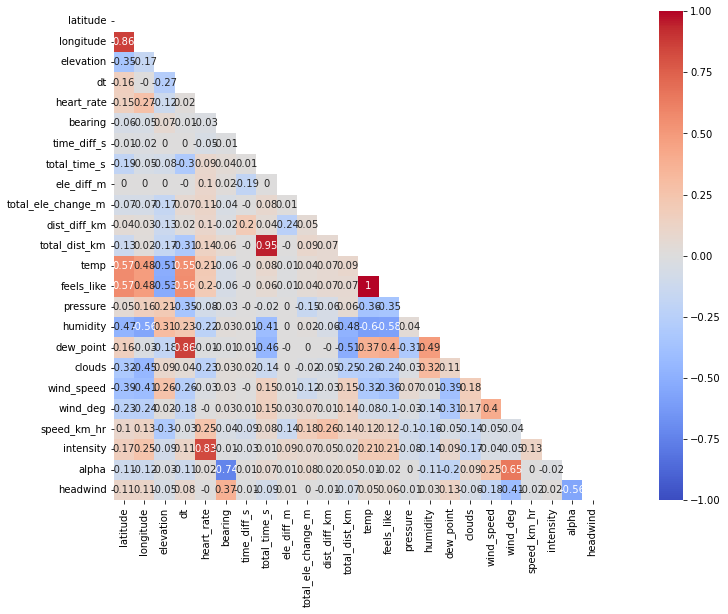

In [41]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (20, 9))

# Get correlation of variables.
corr = round(ah_df.corr(), 2)

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr,
           mask = mask,
           square = True,
           cmap = 'coolwarm', # coolwarm and viridis are good for color blindness
           annot = True,
           vmin = -1,
           vmax = 1);

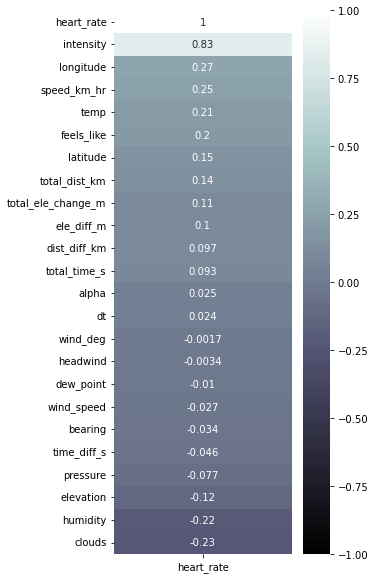

In [42]:
hr_corr = ah_df.corr()[['heart_rate']].sort_values(by = 'heart_rate', ascending = False)

plt.figure(figsize = (4, 10))

sns.heatmap(hr_corr,
           cmap = 'bone',
           annot = True,
           vmin = -1,
           vmax = 1);

# Curious Findings
---

Weather variables, like temperature and wind speed had some stark differences between the average and high datasets. This made sense since average was taken from summer and high was taken from the spring. 

![image info](../images/temperature.jpeg)

Of course, distance also had a pretty big difference. Making sense since my perceived performance metric was based on how far I was able to ride without getting tired. In April I was doing much longer rides, much more consistently. 

![image info](../images/distance.jpeg)

Heart rate and calculated speed were actually very similar between the two periods. 

![image info](../images/heart_rate.jpeg)
![image info](../images/speed.jpeg)

Speed made sense since I can only go so fast with the type of bike I have and speed is dependent on a lot of other variables. 

When comparing distance with heart rate during the two periods. I could see how shorter distances had more variability in heart rate during the average period. Heart rate hit higher levels at shorter distances. During the high period, there was more of a constant heart rate maintained at a higher intensity. This could have indicated higher performance since I was able to maintain higher intensities for longer distances or the impact of other variables like increased temperatures in July had an impact. 

![image info](../images/a_distance_hr.jpeg)
![image info](../images/h_distance_hr.jpeg)

# Strava Timeseries EDA
## Bonus
---
#### 96 Activities - 12/18/2022 - 08/11/2022
More to explore here for another time. 

In [43]:
s_df.drop(columns = 'average_cadence', inplace = True)

In [44]:
s_df.drop(columns = 'id').describe()

,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,total_elevation_gain,elev_high,elev_low
count,96.000000,96.000000,96.000000,96.000000,96.000000,68.000000,68.000000,68.000000,96.000000,92.000000,92.000000
mean,32360.305208,5914.812500,7269.489583,5.221010,9.628073,125.900000,151.382353,60.808824,169.740625,103.878261,40.343478
std,28401.092931,4662.925674,6302.506679,1.417029,3.457059,16.277427,19.861483,69.686988,206.159955,104.466766,50.555513
min,0.000000,328.000000,343.000000,0.000000,0.000000,76.500000,89.000000,0.000000,0.000000,-7.400000,-27.600000
25%,16239.150000,3057.000000,3311.250000,4.823750,7.825750,117.025000,140.000000,16.000000,33.500000,40.950000,18.900000
50%,27487.800000,4835.500000,5261.000000,5.701500,8.827000,127.900000,156.500000,34.500000,67.000000,54.700000,30.200000
75%,32893.875000,6971.750000,9202.000000,6.084750,12.751000,136.325000,165.250000,75.250000,275.625000,151.925000,37.200000
max,129736.000000,21457.000000,26828.000000,7.801000,16.945000,154.000000,179.000000,299.000000,1006.000000,573.200000,296.800000


In [45]:
s_df['start_date_local'] = pd.to_datetime(s_df['start_date_local'])
s_df.set_index('start_date_local', inplace = True)
s_df.sort_index(inplace = True)

In [46]:
s_month_df = s_df.resample('M').mean().dropna()

In [47]:
s_month_df

,id,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,total_elevation_gain,elev_high,elev_low
start_date_local,,,,,,,,,,,,
2022-03-31,6.833179e+09,34151.177778,5562.388889,6653.555556,5.875222,9.937944,126.469231,147.230769,65.230769,132.383333,71.250000,27.583333
2022-04-30,6.986285e+09,41874.470588,7542.000000,9734.294118,5.101059,10.486118,124.547059,151.823529,69.352941,280.882353,172.411765,68.317647
2022-05-31,7.144590e+09,50309.025000,9160.916667,11858.750000,5.406667,12.744167,124.450000,154.916667,74.000000,348.916667,185.233333,65.483333
2022-06-30,7.325944e+09,24813.537500,4711.625000,6013.250000,5.557750,10.727500,122.800000,148.000000,35.500000,174.750000,102.575000,35.650000
2022-07-31,7.484550e+09,16387.227273,3980.909091,5300.727273,3.708455,6.766182,131.418182,155.909091,51.636364,78.727273,58.000000,18.025000
2022-08-31,7.599653e+09,24819.514286,4289.857143,4870.142857,5.522000,8.346429,125.485714,148.714286,52.571429,56.857143,38.114286,16.228571


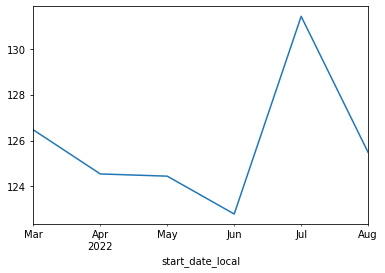

In [48]:
s_month_df['average_heartrate'].plot();